In [1]:
# coding: utf-8
!pip install pillow pandas numpy


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [3]:

import os
import pandas as pd
import numpy as np
from numpy import asarray
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import PIL

/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboar

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [5]:

#print(df.columns)
#print(df.head())
#list_dir = os.listdir("train_images/")
#classes = df["AdoptionSpeed"].unique()
#df = df[df["Quantity"] == 1]
#adoptionSpeed, photos = [], []
#for pet_id in df["PetID"]:
#    for file in [file for file in list_dir if file.startswith(pet_id)]:
#        new_loc = os.path.join(str(df.loc[df["PetID"] == pet_id, "AdoptionSpeed"].item()), file)
#        copyfile(os.path.join("train_images/", file), new_loc)
        

In [6]:
batch_size = 64
epochs = 1
IMG_HEIGHT = 64
IMG_WIDTH = 64
train_dir = "train_photos/"

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255,
    validation_split=0.2)

    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,

train_generator = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_image_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 33381 images belonging to 5 classes.
Found 8342 images belonging to 5 classes.


In [8]:
#sample_training_images, _ = next(train_generator)
#def plotImages(images_arr):
#    fig, axes = plt.subplots(1, 5, figsize=(20,20))
#    axes = axes.flatten()
#    for img, ax in zip( images_arr, axes):
#        ax.imshow(img)
#        ax.axis('off')
#    plt.tight_layout()
#    plt.show()
#plotImages(sample_training_images[:5])


In [9]:
def get_compiled_model():
    model = Sequential([
        Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(5, activation='softmax', name='output'),
        ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [10]:
model = get_compiled_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [11]:
#model.weights

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 5000,
    validation_data = validation_generator, 
    validation_steps = 1000,
    shuffle = True,
    epochs = 4)
history

Epoch 1/4
5000/5000 [==============================] - 926s 185ms/step - loss: 0.7807 - accuracy: 0.6664 - val_loss: 3.2562 - val_accuracy: 0.2577
Epoch 2/4
5000/5000 [==============================] - 1017s 203ms/step - loss: 0.5152 - accuracy: 0.7881 - val_loss: 4.7521 - val_accuracy: 0.2640
Epoch 3/4
5000/5000 [==============================] - 954s 191ms/step - loss: 0.4124 - accuracy: 0.8346 - val_loss: 5.4026 - val_accuracy: 0.2634
Epoch 4/4
5000/5000 [==============================] - 911s 182ms/step - loss: 0.3569 - accuracy: 0.8583 - val_loss: 6.2507 - val_accuracy: 0.2623


In [18]:
history.history

{'loss': [0.7807450890541077,
  0.5152294039726257,
  0.4123726189136505,
  0.35685020685195923],
 'accuracy': [0.6663810610771179,
  0.7880586981773376,
  0.8346025347709656,
  0.8583242297172546],
 'val_loss': [3.256234884262085,
  4.75211763381958,
  5.402553081512451,
  6.250675201416016],
 'val_accuracy': [0.2576809525489807,
  0.26400965452194214,
  0.26335135102272034,
  0.2623460590839386]}

In [19]:
model.save('the_model_.h5')

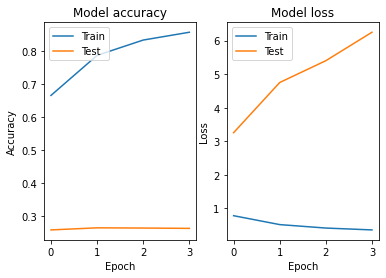

In [20]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

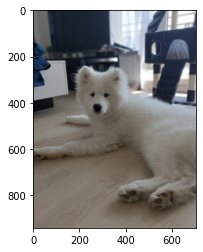

In [54]:
piospios = PIL.Image.open('piospios.jpg')
plt.imshow(piospios)

In [148]:
def predict():
    image_generator = ImageDataGenerator(rescale=1./255)
    generator = image_generator.flow_from_directory(
        "input/",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode=None)
    return model.predict_classes(generator, batch_size=None)

In [150]:
predict()


Found 9 images belonging to 1 classes.


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)